# King Country House Price Prediction

Bu çalşma KC eyaletindeki ev fiyatalrına ait veri seti bir regresyon modeli geliştirmek için yapılmıştır. Evin özelliklerine göre fiyatı tahmin edilmektedir.

### DATA
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [7]:
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [8]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\BTK_24_ML\DAY4

03.03.2024  11:14    <DIR>          .
03.03.2024  10:39    <DIR>          ..
03.03.2024  10:50    <DIR>          .ipynb_checkpoints
17.02.2024  08:20           732.191 combine.csv
17.02.2024  08:21             5.533 heightweight.csv
03.03.2024  11:14             3.520 KC House Predict.ipynb
17.02.2024  08:21         2.515.206 kc_house_data.csv
17.02.2024  08:21               312 PastHires.csv
17.02.2024  08:21         1.529.169 sales.csv
               6 File(s)      4.785.931 bytes
               3 Dir(s)  52.539.138.048 bytes free


In [87]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Preprocessing

In [88]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [89]:
df2=df.copy()

In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
#df2.set_index('id')

In [92]:
df_kor=df2.drop(['id', 'date'],axis=1)
df_kor.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [25]:
df['bathrooms'].max()#

8.0

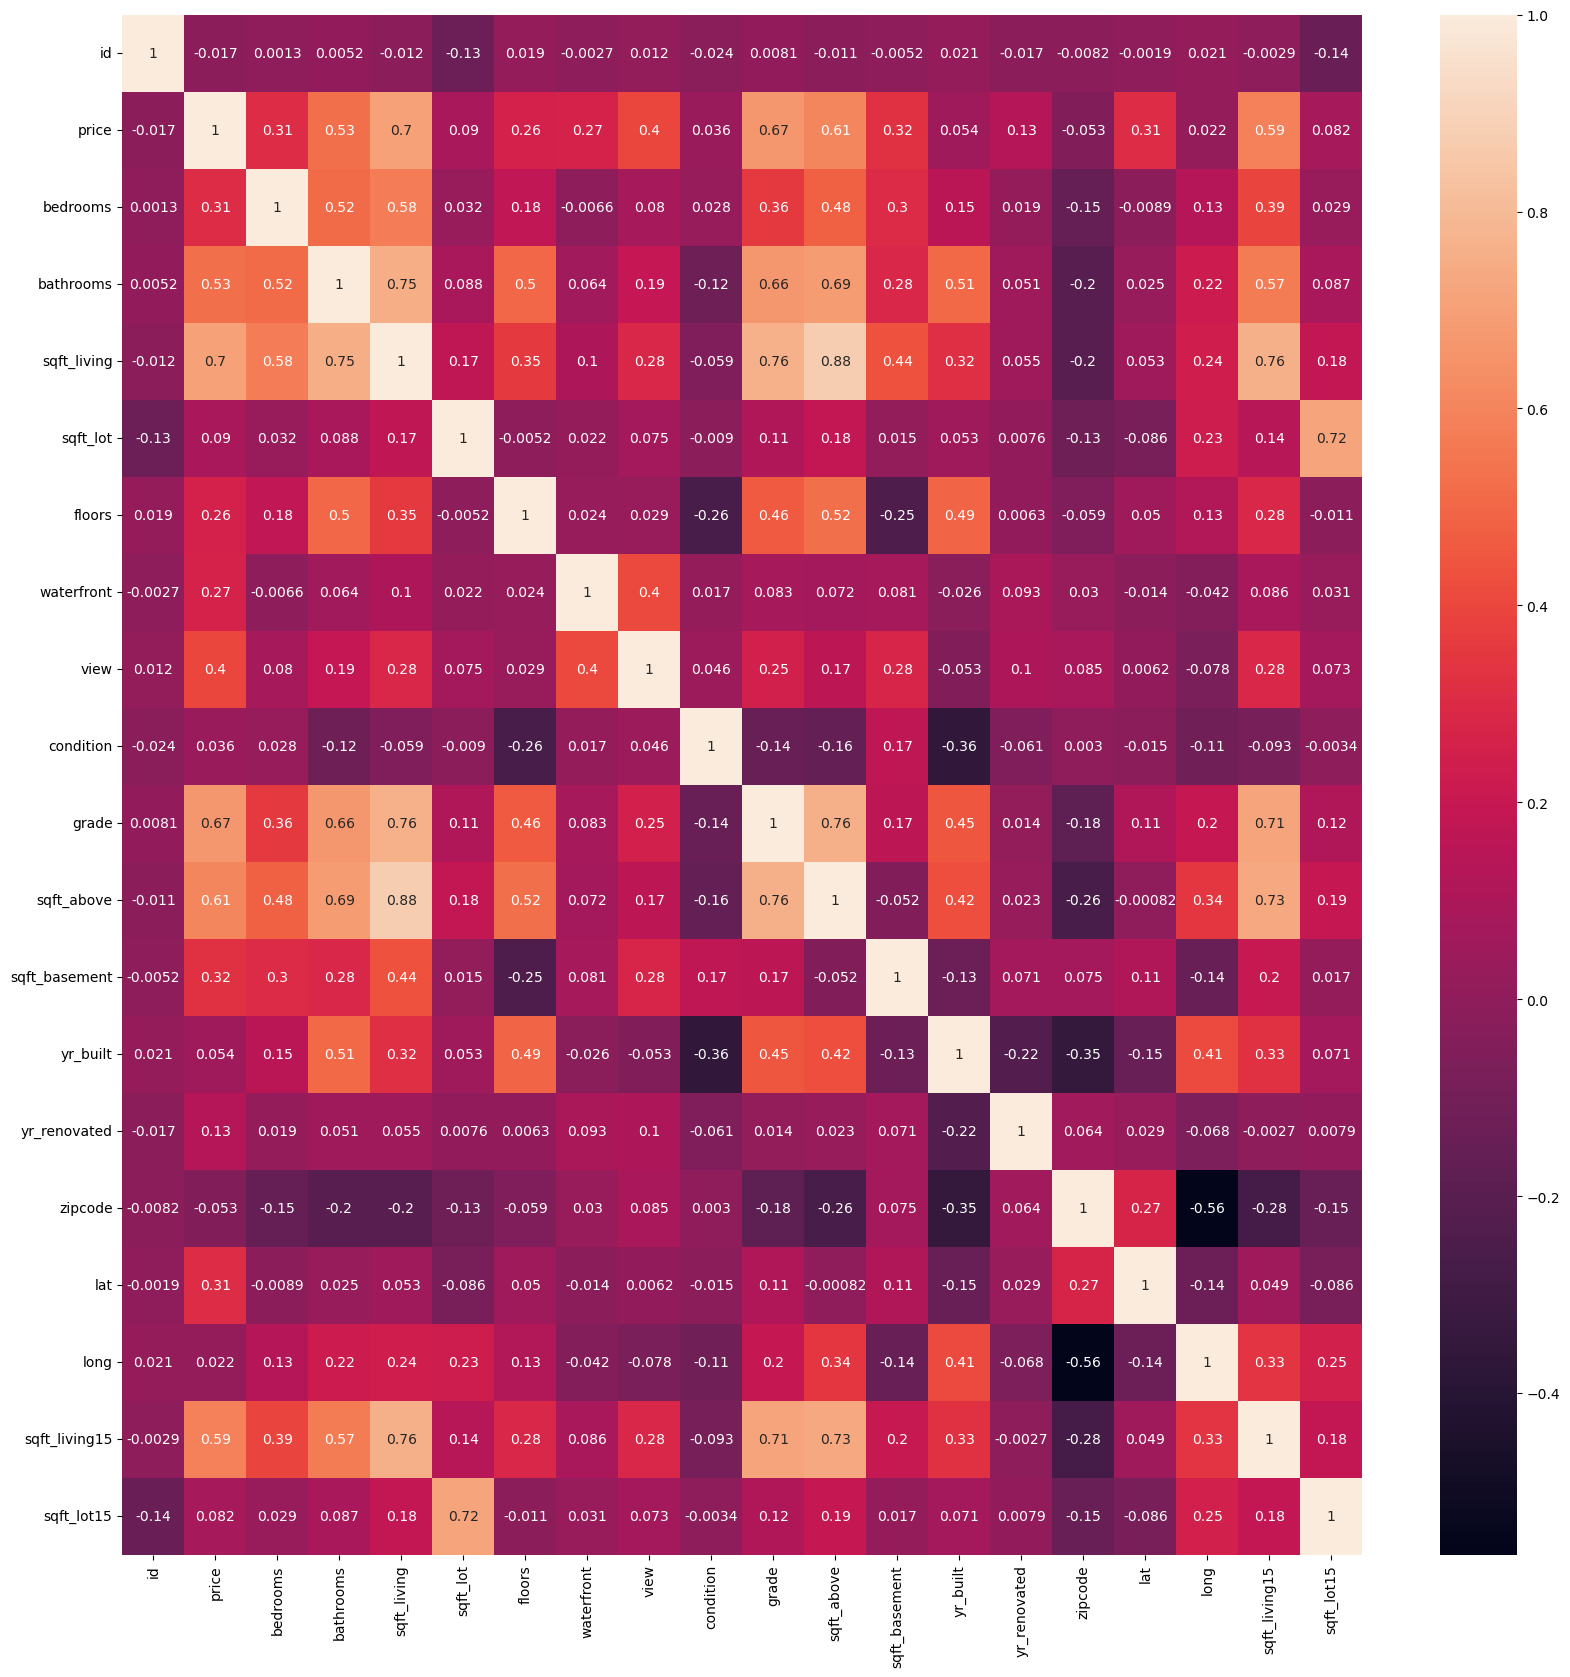

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)
plt.show()

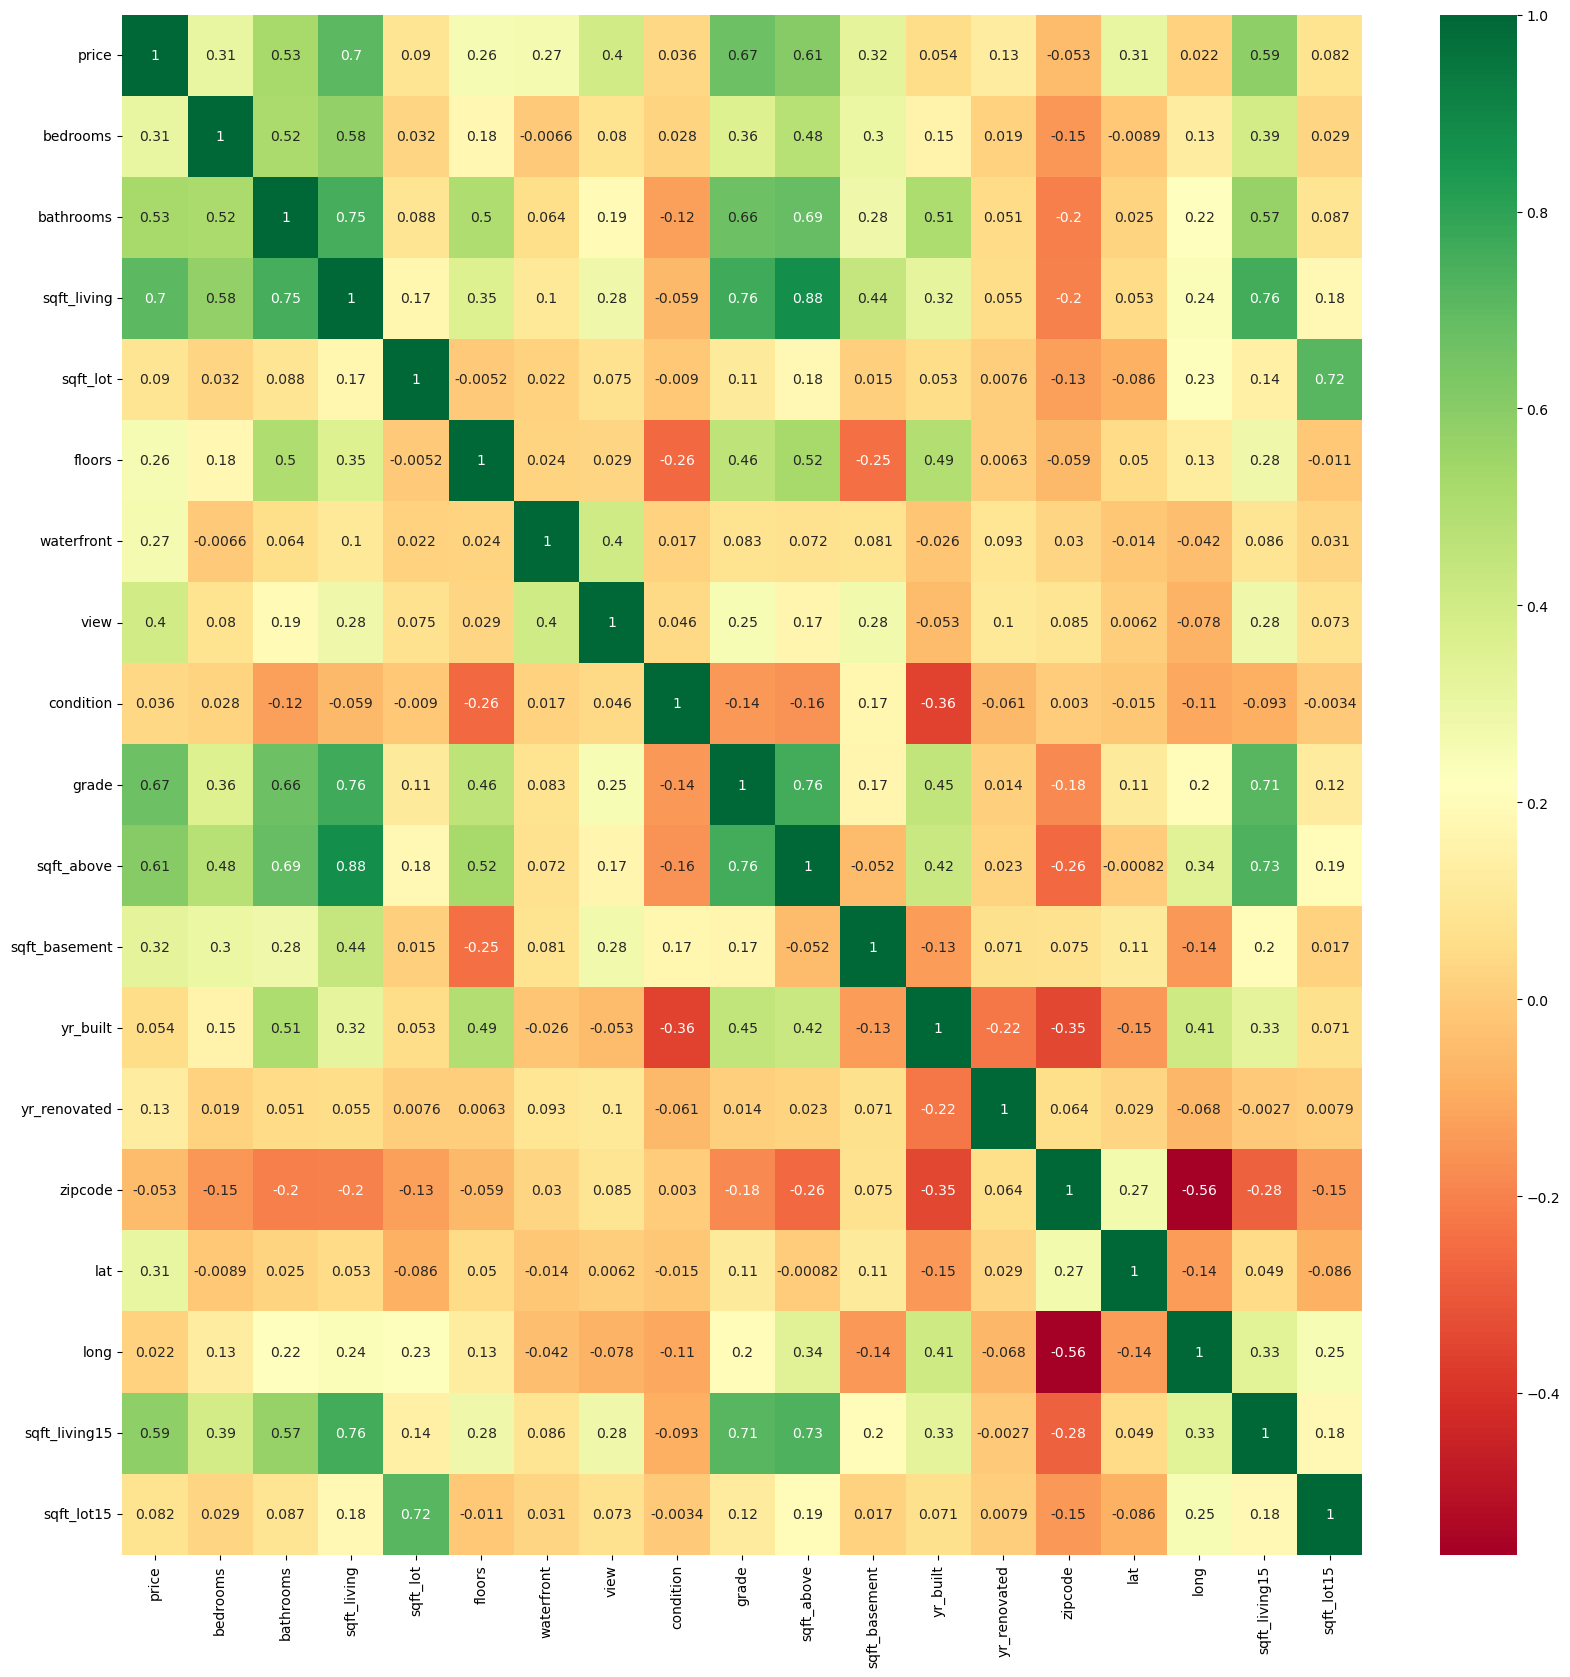

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True, cmap='RdYlGn' )
plt.show()

In [94]:
abs(df_kor.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
Name: price, dtype: float64

In [95]:
df['bedrooms'].max()

33

In [96]:
df['bedrooms'].min()

0

In [97]:
df['bedrooms'].mean()

3.37084162309721

In [98]:
df_bedrooms_outliers=df2[df2['bedrooms']>(df2['bedrooms'].mean()+3*df2['bedrooms'].std())]

In [99]:
df_bedrooms_outliers_min=df2[df2['bedrooms']<(df2['bedrooms'].mean()-3*df2['bedrooms'].std())]

In [100]:
df_bedrooms_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,20140620T000000,1950000.0,7,3.50,4640,15235,2.0,0,1,...,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
1135,4024100951,20150105T000000,420000.0,7,3.00,2940,8624,1.0,0,0,...,8,1690,1250,1977,0,98155,47.7555,-122.307,1850,8031
1241,7227802030,20140623T000000,350000.0,7,3.00,2800,9569,1.0,0,2,...,7,1400,1400,1963,0,98056,47.5102,-122.183,2150,7333
1660,9126101740,20141204T000000,490000.0,8,5.00,2800,2580,2.0,0,0,...,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
3721,5451100490,20150115T000000,884900.0,7,4.75,5370,10800,1.5,0,0,...,8,5370,0,1967,0,98040,47.5380,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18823,4040500100,20141020T000000,539000.0,7,2.25,2620,6890,2.0,0,0,...,7,2620,0,1961,0,98007,47.6123,-122.134,2070,7910
18975,1778360150,20140620T000000,1240000.0,7,5.50,6630,13782,2.0,0,0,...,10,4930,1700,2004,0,98006,47.5399,-122.118,4470,8639
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
19302,3756900027,20141125T000000,575000.0,8,3.00,3840,15990,1.0,0,0,...,7,2530,1310,1961,0,98034,47.7111,-122.211,1380,8172


In [44]:
df_bedrooms_outliers_min

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [102]:
len(df_bedrooms_outliers_min)

13

<Axes: ylabel='bedrooms'>

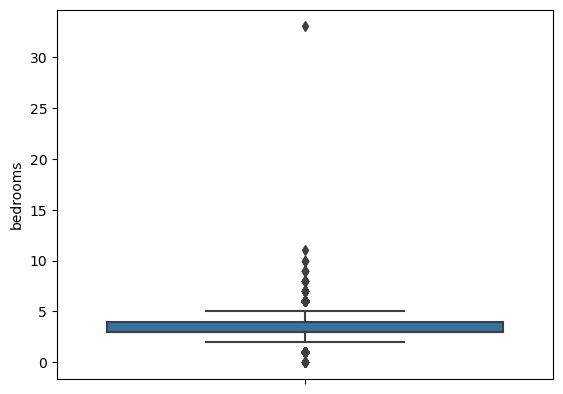

In [103]:
sns.boxplot(y=df['bedrooms'])

In [105]:
outliers=df_kor.quantile(.97)

In [106]:
outliers.head()

price          1388000.00
bedrooms             5.00
bathrooms            3.50
sqft_living       4140.00
sqft_lot         67436.84
Name: 0.97, dtype: float64

In [107]:
df3=df2[df2['price']<outliers['price']]

In [108]:
df3['price'].max()

1387800.0

In [109]:
df3['bedrooms'].max()

33

In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20960 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20960 non-null  int64  
 1   date           20960 non-null  object 
 2   price          20960 non-null  float64
 3   bedrooms       20960 non-null  int64  
 4   bathrooms      20960 non-null  float64
 5   sqft_living    20960 non-null  int64  
 6   sqft_lot       20960 non-null  int64  
 7   floors         20960 non-null  float64
 8   waterfront     20960 non-null  int64  
 9   view           20960 non-null  int64  
 10  condition      20960 non-null  int64  
 11  grade          20960 non-null  int64  
 12  sqft_above     20960 non-null  int64  
 13  sqft_basement  20960 non-null  int64  
 14  yr_built       20960 non-null  int64  
 15  yr_renovated   20960 non-null  int64  
 16  zipcode        20960 non-null  int64  
 17  lat            20960 non-null  float64
 18  long       

In [70]:
df3[df3['bedrooms']==33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [111]:
df4=df3[df3['bedrooms']<outliers['bedrooms']]

In [112]:
df4['bedrooms'].max()

4

In [114]:
df4['price'].max()

1387800.0

In [115]:
df5=df4[df4['sqft_living']<outliers['sqft_living']]

In [116]:
df6=df5[df5['bathrooms']<outliers['bathrooms']]

In [125]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18519 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18519 non-null  int64  
 1   date           18519 non-null  object 
 2   price          18519 non-null  float64
 3   bedrooms       18519 non-null  int64  
 4   bathrooms      18519 non-null  float64
 5   sqft_living    18519 non-null  int64  
 6   sqft_lot       18519 non-null  int64  
 7   floors         18519 non-null  float64
 8   waterfront     18519 non-null  int64  
 9   view           18519 non-null  int64  
 10  condition      18519 non-null  int64  
 11  grade          18519 non-null  int64  
 12  sqft_above     18519 non-null  int64  
 13  sqft_basement  18519 non-null  int64  
 14  yr_built       18519 non-null  int64  
 15  yr_renovated   18519 non-null  int64  
 16  zipcode        18519 non-null  int64  
 17  lat            18519 non-null  float64
 18  long       

In [126]:
df.shape

(21613, 21)

In [127]:
df6.shape

(18519, 21)

<Axes: xlabel='price', ylabel='Count'>

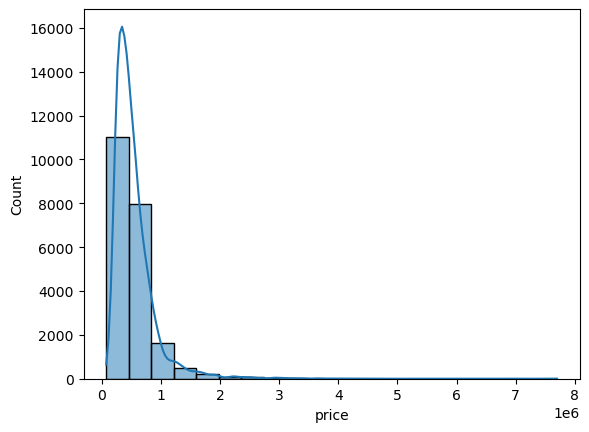

In [128]:
sns.histplot(x=df['price'], bins=20, kde=True)

<Axes: xlabel='Count', ylabel='price'>

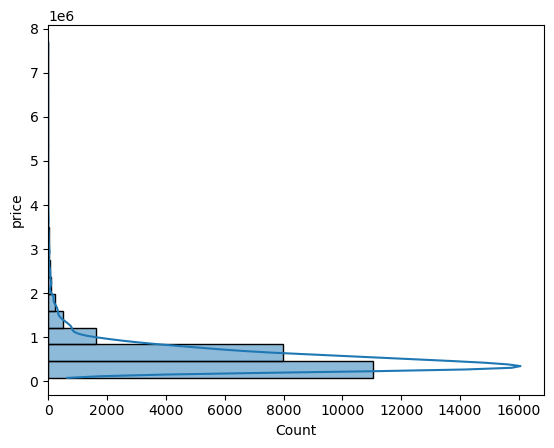

In [120]:
sns.histplot(y=df['price'], bins=20, kde=True)

<Axes: xlabel='price', ylabel='Count'>

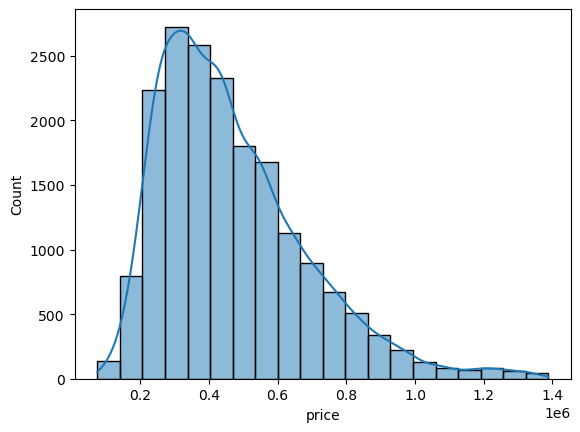

In [121]:
sns.histplot(x=df6['price'], bins=20, kde=True)

In [122]:
df6['price'].min()

75000.0

In [129]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18519 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18519 non-null  int64  
 1   date           18519 non-null  object 
 2   price          18519 non-null  float64
 3   bedrooms       18519 non-null  int64  
 4   bathrooms      18519 non-null  float64
 5   sqft_living    18519 non-null  int64  
 6   sqft_lot       18519 non-null  int64  
 7   floors         18519 non-null  float64
 8   waterfront     18519 non-null  int64  
 9   view           18519 non-null  int64  
 10  condition      18519 non-null  int64  
 11  grade          18519 non-null  int64  
 12  sqft_above     18519 non-null  int64  
 13  sqft_basement  18519 non-null  int64  
 14  yr_built       18519 non-null  int64  
 15  yr_renovated   18519 non-null  int64  
 16  zipcode        18519 non-null  int64  
 17  lat            18519 non-null  float64
 18  long       

In [131]:
import datetime
import numpy as np

In [135]:
df6['zipcode']=df6['zipcode'].astype('category')

In [136]:
df6['zipcode'].dtype

CategoricalDtype(categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008,
                  98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027,
                  98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
                  98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056,
                  98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
                  98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
                  98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
                  98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
                  98168, 98177, 98178, 98188, 98198, 98199],
, ordered=False)

In [139]:
df6['zipcode'].nunique()

70

In [140]:
df6['bedrooms']=df6['bedrooms']**2

In [141]:
df6['bedrooms'].max()

16

In [142]:
df6['bathrooms']=df6['bathrooms']**2

In [143]:
df6['sqft_living']=df6['sqft_living']**2

In [146]:
df6['age']=2015-df6['yr_built']
#df6['age']=datetime.datetime.now().year-df6['yr_built']
#Veri tabanı 2015 yılına kadar olduğu dikkate alınmalı

In [152]:
#df6['age']=df6['age']-9

In [147]:
df6['age']

0        69
1        73
2        91
3        59
4        37
         ..
21608    15
21609    10
21610    15
21611    20
21612    16
Name: age, Length: 18519, dtype: int64

In [153]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18519 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             18519 non-null  int64   
 1   date           18519 non-null  object  
 2   price          18519 non-null  float64 
 3   bedrooms       18519 non-null  int64   
 4   bathrooms      18519 non-null  float64 
 5   sqft_living    18519 non-null  int64   
 6   sqft_lot       18519 non-null  int64   
 7   floors         18519 non-null  float64 
 8   waterfront     18519 non-null  int64   
 9   view           18519 non-null  int64   
 10  condition      18519 non-null  int64   
 11  grade          18519 non-null  int64   
 12  sqft_above     18519 non-null  int64   
 13  sqft_basement  18519 non-null  int64   
 14  yr_built       18519 non-null  int64   
 15  yr_renovated   18519 non-null  int64   
 16  zipcode        18519 non-null  category
 17  lat            18519 non-null  float

In [155]:
df6['age'].describe()

count    18519.000000
mean        45.075166
std         29.075607
min          0.000000
25%         21.000000
50%         42.000000
75%         65.000000
max        115.000000
Name: age, dtype: float64

In [156]:
df6['yr_renovated']=np.where(df6['yr_renovated']==0,0,1)

In [157]:
df6['yr_renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: yr_renovated, Length: 18519, dtype: int32

In [159]:
df6.shape

(18519, 22)

In [160]:
df['sqft_basement']=np.where(df['sqft_basement']==0,0,1)

In [161]:
y=df6['price']

In [169]:
X=df6.drop(['price','date','id','lat','long'],axis=1)

In [166]:
df6.iloc[:,1:4] #iloc ile satır ve sütun belirtilebilir

,date,price,bedrooms
0,20141013T000000,221900.0,9
1,20141209T000000,538000.0,9
2,20150225T000000,180000.0,4
3,20141209T000000,604000.0,16
4,20150218T000000,510000.0,9
...,...,...,...
21608,20140521T000000,360000.0,9
21609,20150223T000000,400000.0,16
21610,20140623T000000,402101.0,4
21611,20150116T000000,400000.0,9


In [168]:
df6.iloc[:] #df.loc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,9,1.0000,1392400,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,...,2170,400,1951,1,98125,47.7210,-122.319,1690,7639,64
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,20141209T000000,604000.0,16,9.0000,3841600,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,20150218T000000,510000.0,9,4.0000,2822400,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,9,6.2500,2340900,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6
21609,6600060120,20150223T000000,400000.0,16,6.2500,5336100,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1
21610,1523300141,20140623T000000,402101.0,4,0.5625,1040400,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6
21611,291310100,20150116T000000,400000.0,9,6.2500,2560000,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,11


In [170]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,age
0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,60
1,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,400,1951,1,98125,1690,7639,64
2,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,82
3,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,50
4,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,28


In [171]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [172]:
#dummies
X=pd.get_dummies(X,columns=['zipcode'], drop_first=True)

In [173]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,...,False,False,False,False,False,False,True,False,False,False
1,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,...,False,False,False,False,False,False,False,False,False,False
2,4,1.0000,592900,10000,1.0,0,0,3,6,770,...,False,False,False,False,False,False,False,False,False,False
3,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,...,False,False,False,False,False,False,False,False,False,False
4,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,...,False,False,False,False,False,False,False,False,False,False
21609,16,6.2500,5336100,5813,2.0,0,0,3,8,2310,...,True,False,False,False,False,False,False,False,False,False
21610,4,0.5625,1040400,1350,2.0,0,0,3,7,1020,...,False,False,False,False,False,False,False,False,False,False
21611,9,6.2500,2560000,2388,2.0,0,0,3,8,1600,...,False,False,False,False,False,False,False,False,False,False


In [174]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=.2,
                                               random_state=42)

### Modelling

In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [182]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [184]:
# defined Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

In [185]:
def modelling(model, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Training Model
        model.fit(X_train, y_train)
        # predict test data
        predictions = model.predict(X_test)
        # Calculation of Metrics
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        # save results
        results[name] = (mse, rmse, r2)
        # Sonuçları yazdırma
    for name, (mse, rmse, r2) in results.items():
        print(f"{name}: Average RMSE: {rmse:.2f}")
        print(f"{name}: R2: {r2:.2f}")
        print("-" * 50)
    # BEST MODEL
    best_model_name = min(results, key=lambda x: results[x][0])
    best_model_mse, best_model_rmse, best_model_r2 = results[best_model_name]
    print(f"\nBest Performing Model: {best_model_name} with Average RMSE: {best_model_rmse:.2f} and R2: {best_model_r2:.2f}")

In [186]:
modelling(models, X_train_scaled, y_train, X_test_scaled, y_test)

Linear Regression: Average RMSE: 88494.16
Linear Regression: R2: 0.83
--------------------------------------------------
Decision Tree: Average RMSE: 138041.92
Decision Tree: R2: 0.58
--------------------------------------------------
Ridge: Average RMSE: 88489.67
Ridge: R2: 0.83
--------------------------------------------------
Lasso: Average RMSE: 88491.64
Lasso: R2: 0.83
--------------------------------------------------
ElasticNet: Average RMSE: 99718.79
ElasticNet: R2: 0.78
--------------------------------------------------

Best Performing Model: Ridge with Average RMSE: 88489.67 and R2: 0.83
